# AlexNet CNN Architecture

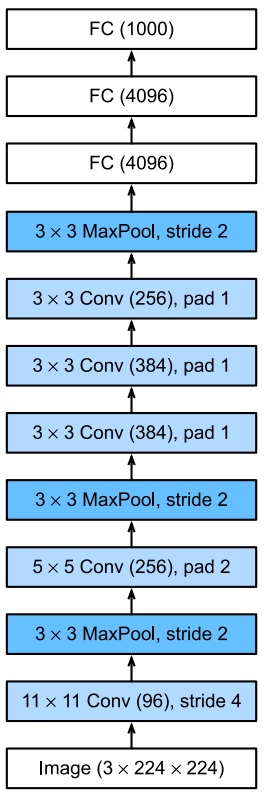

In [101]:
import torch
from torch import nn
import torchinfo

print(torch.version.cuda)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

None
Using device: cpu


In [102]:
class AlexNet(nn.Module):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(out_channels=96, kernel_size=(11, 11), padding=1, stride=4), nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3, 3), stride=2),
            nn.LazyConv2d(out_channels=256, kernel_size=(5, 5), padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3, 3), stride=2),
            nn.LazyConv2d(out_channels=384, kernel_size=(3, 3), padding=1), nn.ReLU(),
            nn.LazyConv2d(out_channels=384, kernel_size=(3, 3), padding=1), nn.ReLU(),
            nn.LazyConv2d(out_channels=256, kernel_size=(3, 3), padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3, 3), stride=2), nn.Flatten(),
            nn.LazyLinear(out_features=4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(out_features=4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(out_features=num_classes)
        )
        
    def forward(self, x):
        return self.net(x)

In [103]:
model = AlexNet()

batch_size = 1
channel_size = 1
nh, nw = (224, 224)

torchinfo.summary(model, input_size=(batch_size, channel_size, nh, nw))

c:\Users\adevr\WQU_DL\.venv\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Conv2d: 2-1                       [1, 96, 54, 54]           11,712
│    └─ReLU: 2-2                         [1, 96, 54, 54]           --
│    └─MaxPool2d: 2-3                    [1, 96, 26, 26]           --
│    └─Conv2d: 2-4                       [1, 256, 26, 26]          614,656
│    └─ReLU: 2-5                         [1, 256, 26, 26]          --
│    └─MaxPool2d: 2-6                    [1, 256, 12, 12]          --
│    └─Conv2d: 2-7                       [1, 384, 12, 12]          885,120
│    └─ReLU: 2-8                         [1, 384, 12, 12]          --
│    └─Conv2d: 2-9                       [1, 384, 12, 12]          1,327,488
│    └─ReLU: 2-10                        [1, 384, 12, 12]          --
│    └─Conv2d: 2-11                      [1, 256, 12, 12]       

# VGG Blocks

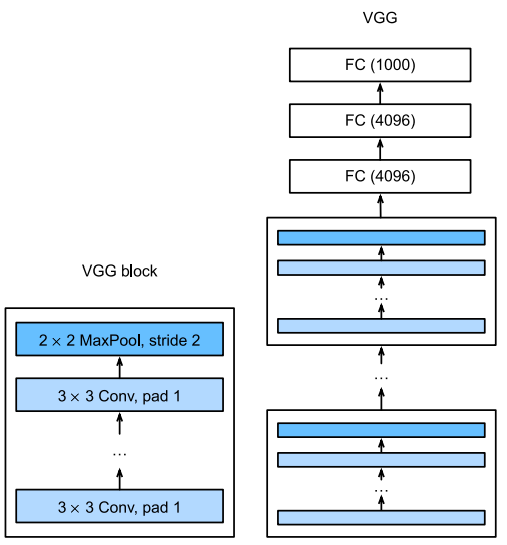

a VGG **block** consists of a sequence of convolutions with 3 × 3 kernels with
padding of 1 (keeping height and width) followed by a 2 × 2 max-pooling layer with stride
of 2 (halving height and width after each block). In the code below, we define a function
called vgg_block to implement one VGG block.

The variable **arch** consists of a
list of tuples (one per block), where each contains two values: **the number of convolutional
layers** and **the number of output channels**, which are precisely the arguments required to
call the vgg_block function. As such, VGG defines a family of networks rather than just a
specific manifestation. To build a specific network we simply iterate over arch to compose
the blocks.

In [104]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

class VGG(nn.Module):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        
        self.net = nn.Sequential(
            *conv_blks,
            nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        return self.net(x)

In [105]:
arch = (
    (1, 64),
    (1, 128),
    (2, 256),
    (2, 512),
    (2, 512)
)
model = VGG(arch, lr=0.1, num_classes=10)

batch_size = 1
channel_size = 1
nh, nw = (224, 224)

torchinfo.summary(model, input_size=(batch_size, channel_size, nh, nw))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Sequential: 2-1                   [1, 64, 112, 112]         --
│    │    └─Conv2d: 3-1                  [1, 64, 224, 224]         640
│    │    └─ReLU: 3-2                    [1, 64, 224, 224]         --
│    │    └─MaxPool2d: 3-3               [1, 64, 112, 112]         --
│    └─Sequential: 2-2                   [1, 128, 56, 56]          --
│    │    └─Conv2d: 3-4                  [1, 128, 112, 112]        73,856
│    │    └─ReLU: 3-5                    [1, 128, 112, 112]        --
│    │    └─MaxPool2d: 3-6               [1, 128, 56, 56]          --
│    └─Sequential: 2-3                   [1, 256, 28, 28]          --
│    │    └─Conv2d: 3-7                  [1, 256, 56, 56]          295,168
│    │    └─ReLU: 3-8                    [1, 256, 56, 56]          --
│    

# Network-in-network (NiN) Blocks

The idea behind NiN is to <u>apply a fully connected layer at each pixel location</u> (for each height and width).

**The
resulting 1×1 convolution can be thought of as a fully connected layer acting independently
on each pixel location.**

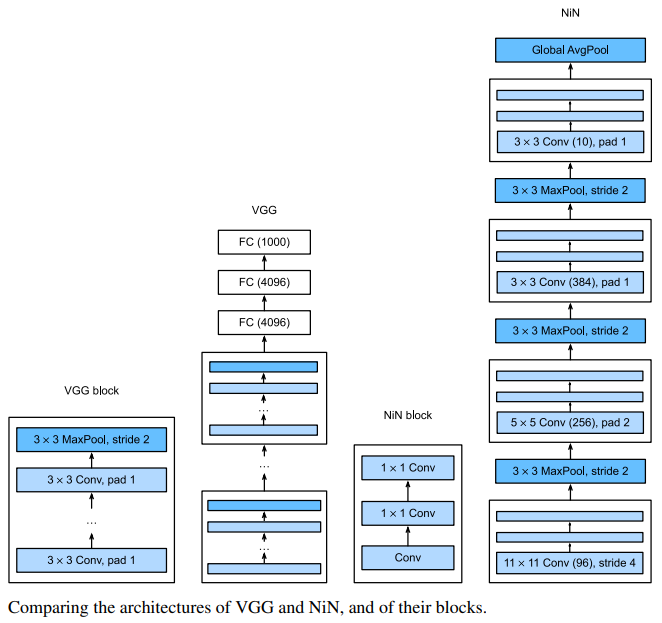

NiN avoids fully connected layers altogether.

Instead, <u>NiN uses a NiN block with a number of
output channels equal to the number of label classes, followed by a global average pooling
layer, yielding a vector of logits.</u>

This design significantly reduces the number of required
model parameters, albeit at the expense of a potential increase in training time.

In [106]:
def nin_block(out_channels, kernel_size, strides, padding):
    net = nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU()
    )
    return net

class NiN(nn.Module):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nin_block(out_channels=96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nin_block(out_channels=256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nin_block(out_channels=384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(p=0.5),
            nin_block(out_channels=num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten()
        )
        
    def forward(self, x):
        return self.net(x)


In [107]:
model = NiN()

batch_size = 1
channel_size = 1
nh, nw = (224, 224)

torchinfo.summary(model, input_size=(batch_size, channel_size, nh, nw))

Layer (type:depth-idx)                   Output Shape              Param #
NiN                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Sequential: 2-1                   [1, 96, 54, 54]           --
│    │    └─Conv2d: 3-1                  [1, 96, 54, 54]           11,712
│    │    └─ReLU: 3-2                    [1, 96, 54, 54]           --
│    │    └─Conv2d: 3-3                  [1, 96, 54, 54]           9,312
│    │    └─ReLU: 3-4                    [1, 96, 54, 54]           --
│    │    └─Conv2d: 3-5                  [1, 96, 54, 54]           9,312
│    │    └─ReLU: 3-6                    [1, 96, 54, 54]           --
│    └─MaxPool2d: 2-2                    [1, 96, 26, 26]           --
│    └─Sequential: 2-3                   [1, 256, 26, 26]          --
│    │    └─Conv2d: 3-7                  [1, 256, 26, 26]          614,656
│    │    └─ReLU: 3-8                    [1, 256, 26, 26]          --


# GoogLeNet

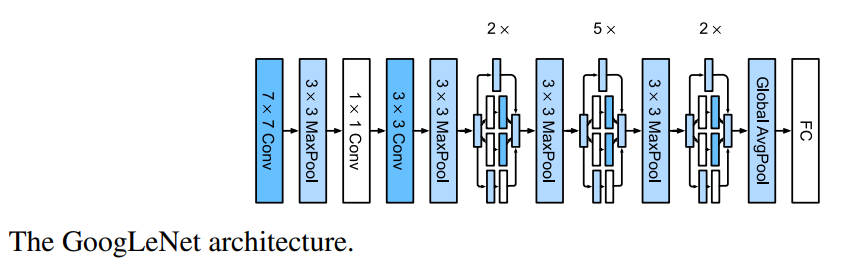

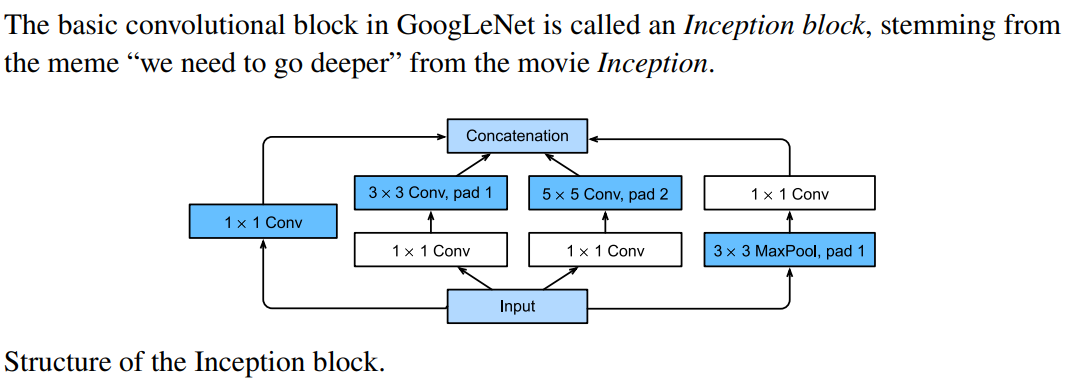

In [108]:
from torch.nn import functional as F

class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1), nn.ReLU
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)
        
    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

# Batch Normalization

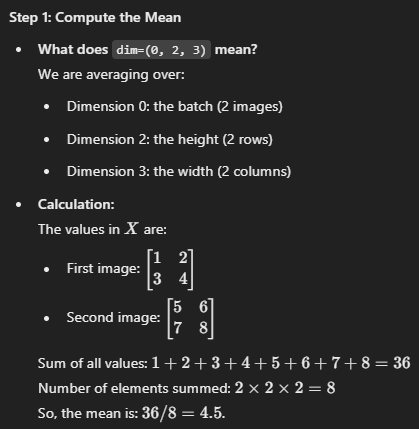

In [109]:
import torch

# Create a simple tensor of shape (2, 1, 2, 2)
X = torch.tensor([[[[1., 2.],
                    [3., 4.]]],
                  [[[5., 6.],
                    [7., 8.]]]])

# Compute the mean over dimensions 0 (batch), 2 and 3 (height and width),
# while keeping the dimensions for proper broadcasting later.
mean = X.mean(dim=(0, 2, 3), keepdim=True)
print("Mean:", mean)

var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
print("Variance:", var)

Mean: tensor([[[[4.5000]]]])
Variance: tensor([[[[5.2500]]]])


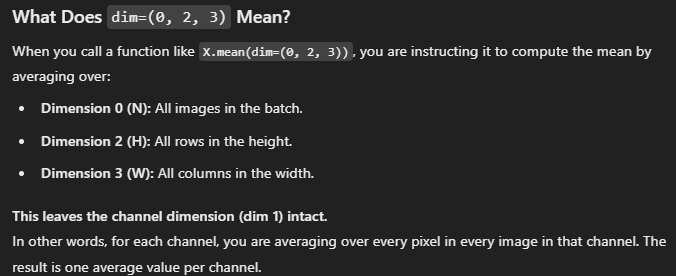

________

# Residual Networks

If a "shallow" model is able to achieve an accuracy, then their deeper counterparts should at least have the same accuracy. But, when the model gets deeper, it becomes more and more difficult for the layers to propagate the information from shallow layers and the **information is lost**. This is called **Degradation Problem**.



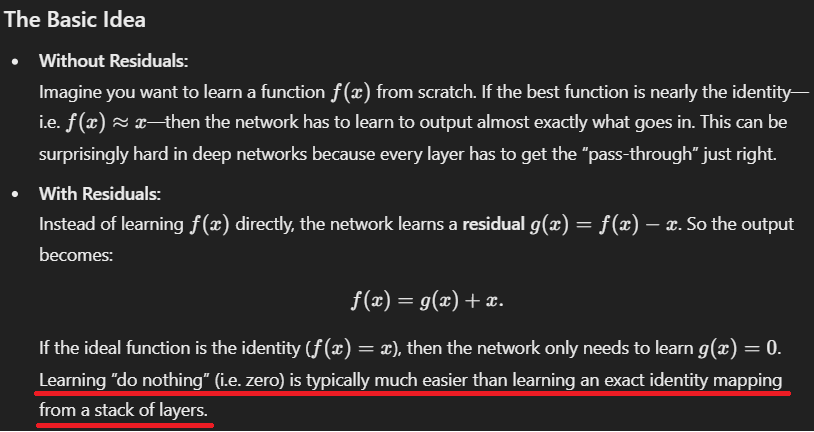

# ResNet
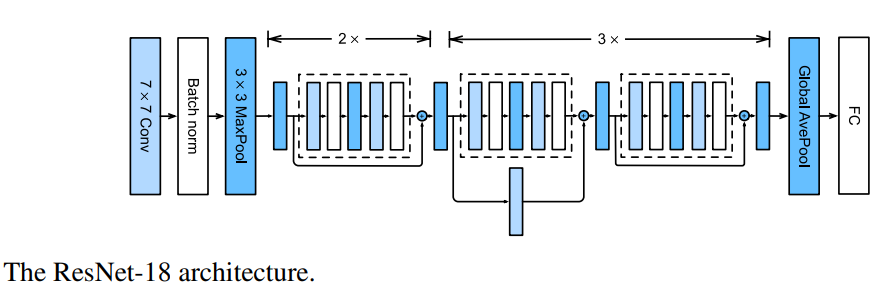
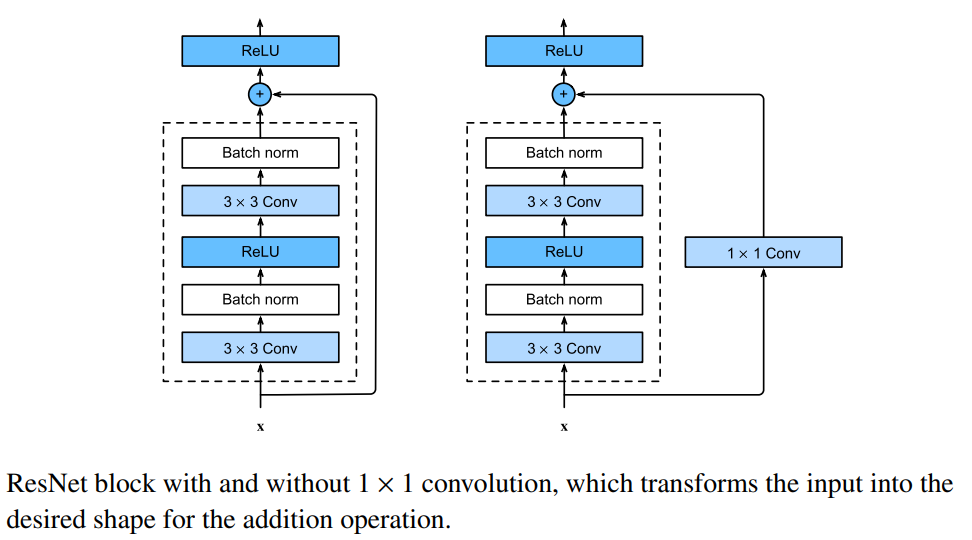

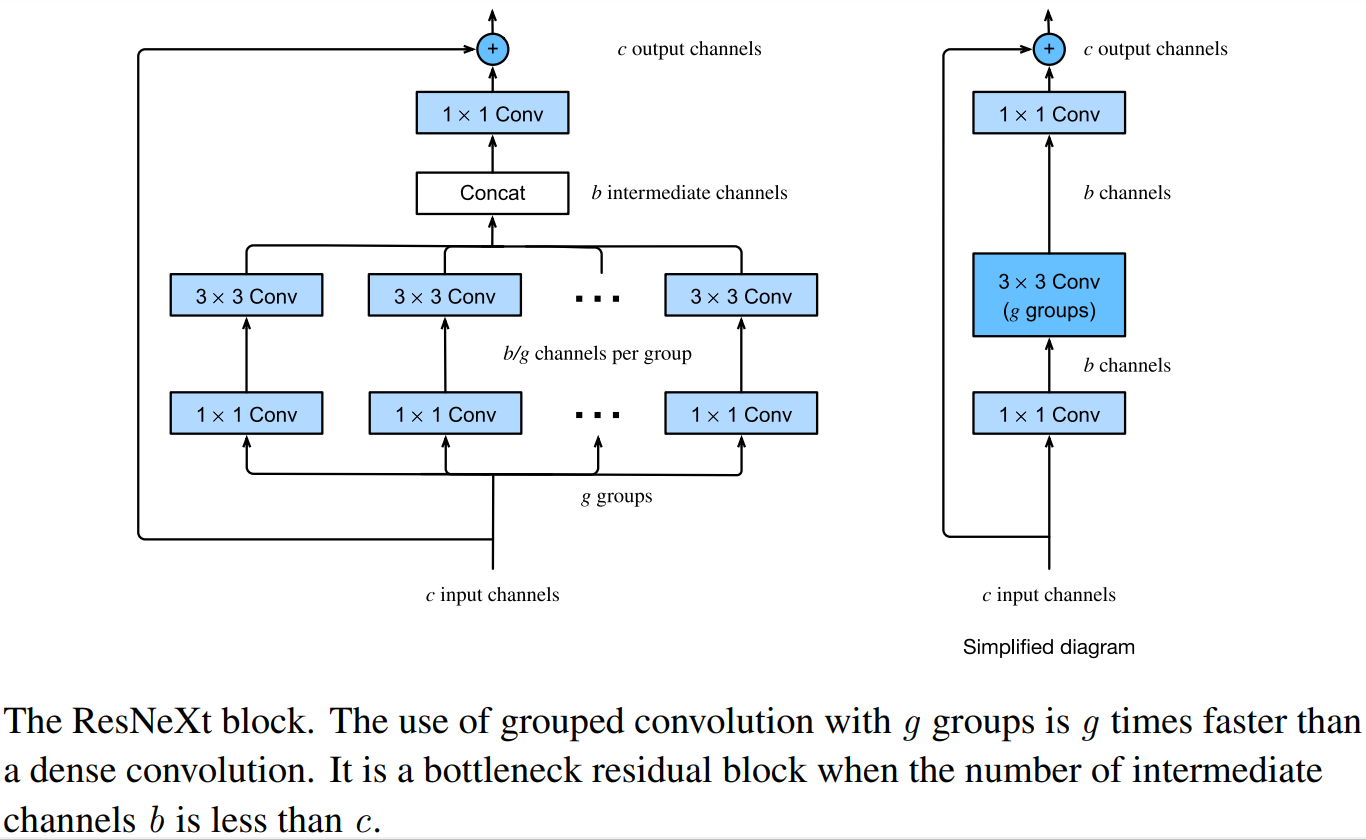

In [110]:
class ResNeXtBlock(nn.Module):  # @save
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False, strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(
            bot_channels,
            kernel_size=3,
            stride=strides,
            padding=1,
            groups=bot_channels // groups
        )
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1, stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

______________

# Designing CNN Architecture, AnyNet design space

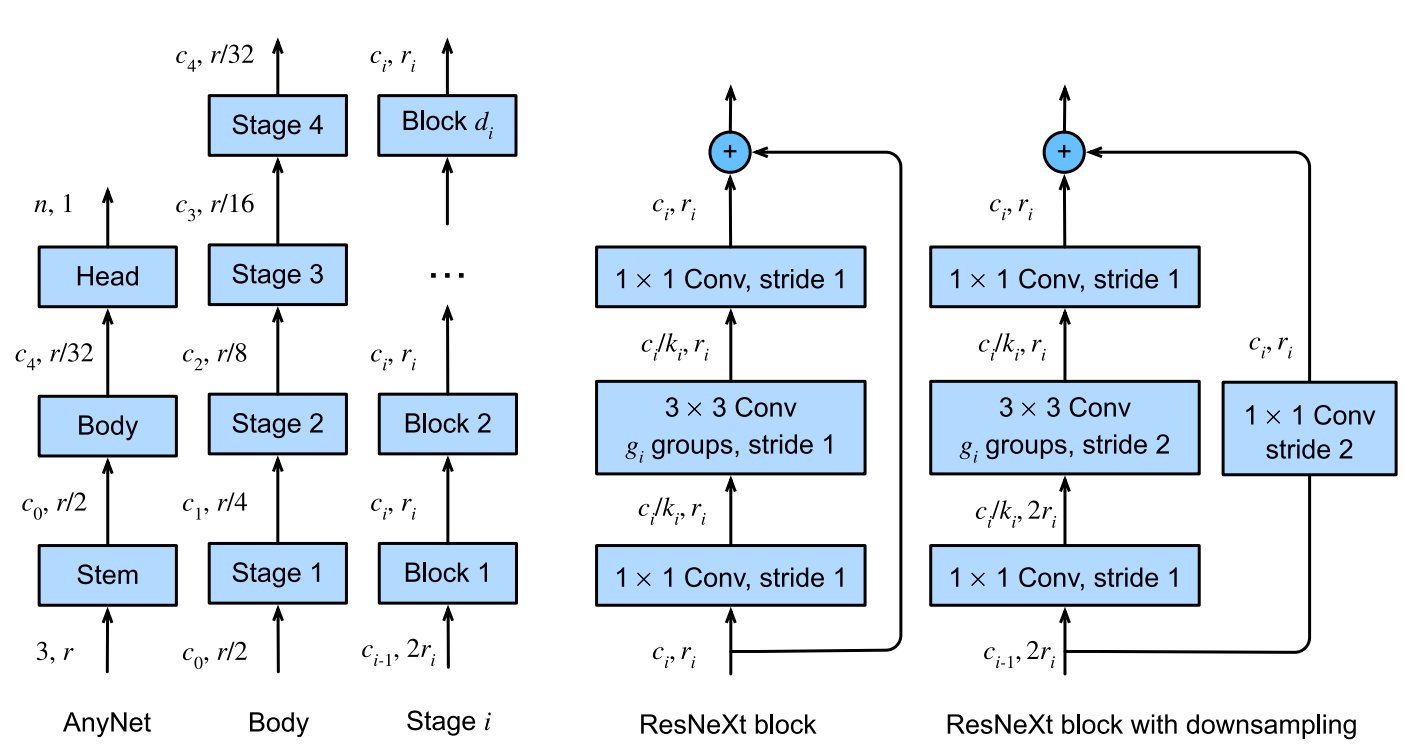

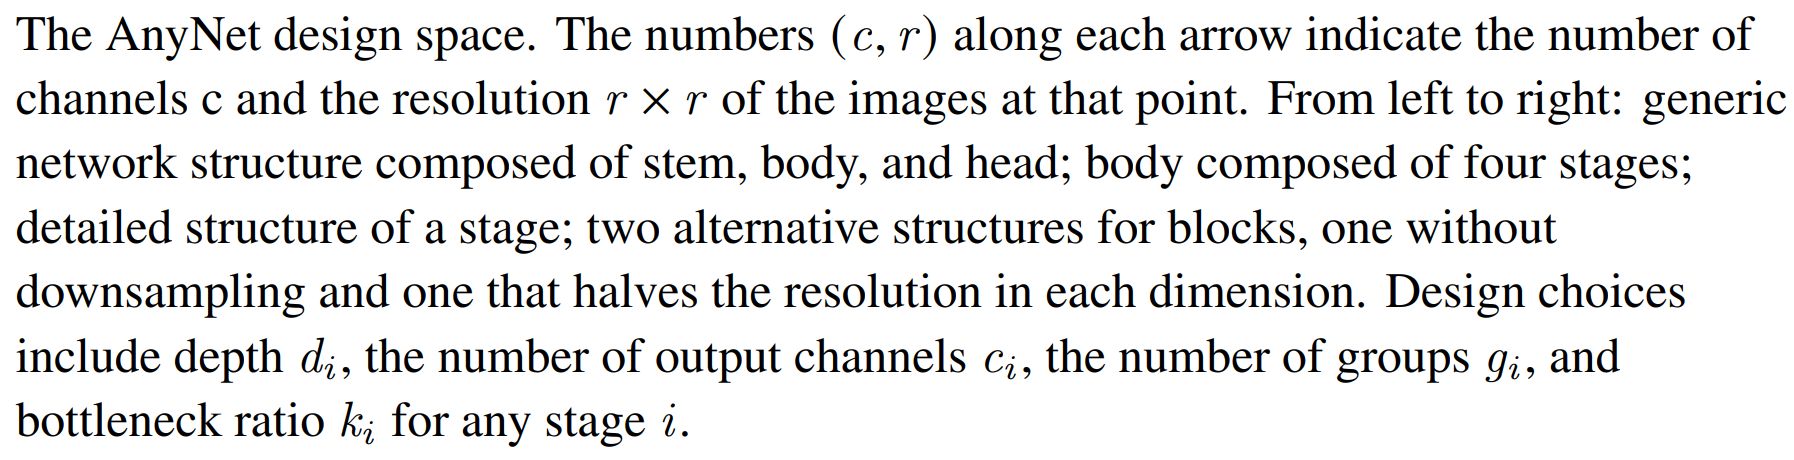

## 1) Stem

The stem takes as its input RGB images (3 channels), using a 3 × 3 convolution with a stride of 2, followed by a batch norm, to halve the resolution from 𝑟 × 𝑟 to 𝑟/2 × 𝑟/2. Moreover, it generates 𝑐0 channels that serve as input to the body.

## 2) Body

Since the network is designed to work well with ImageNet images of shape 224 × 224 × 3,
the body serves to reduce this to 7 × 7 × 𝑐4 through 4 stages (recall that 224/2
1+4 = 7),
each with an eventual stride of 2.

**a.** Each stage consists of *depth* ResNeXt blocks, where *num_channels* specifies the block
width. Note that the first block halves the height and width of input images.

In [112]:
class AnyNet(nn.Module):
    def __init__(self, num_channels, stages_params, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            self.stem(num_channels),
            self.body(stages_params),
            self.head(num_classes)
        )
        
    def stem(self, num_channels):  # num_channels is the c0 variable, which is the number of channels as input to the body
        return nn.Sequential(
            nn.LazyConv2d(out_channels=num_channels, kernel_size=3, stride=2, padding=1), nn.LazyBatchNorm2d(), nn.ReLU()
        )
        
    def stage(self, depth, num_channels, groups, bot_mul):
        blocks = []
        for i in range(depth):
            if i == 0:
                block = ResNeXtBlock(num_channels-1, groups, bot_mul, use_1x1conv=True, strides=2)
                blocks.append(block)
            else:
                block = ResNeXtBlock(num_channels, groups, bot_mul)
                blocks.append(block)
        return nn.Sequential(blocks)
    
    def body(self, stages_params):
        return nn.Sequential(
            [self.stage(*params) for params in stages_params]
        )
        
    def head(self, num_classes):
        return nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(), nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        return self.net(x)

### Quiz

In [124]:
import numpy as np

s = np.array([0.2, -0.5, -1.25, 3.16, -2.57, -2.25])
s_norm = (s - s.min()) / (s.max() - s.min())
s_norm = s_norm * 2 - 1

# Polar transformation
s_arccos = np.arccos(s_norm)
s_arccos_m = np.add.outer(s_arccos, s_arccos)
GramAngular = np.cos(s_arccos_m)

GramAngular

array([[-0.99780099, -0.95099997, -0.82379029, -0.03315881,  0.03315881,
        -0.42954207],
       [-0.95099997, -0.84600203, -0.65942417, -0.27748691,  0.27748691,
        -0.1947212 ],
       [-0.82379029, -0.65942417, -0.41838217, -0.53926702,  0.53926702,
         0.09228448],
       [-0.03315881, -0.27748691, -0.53926702,  1.        , -1.        ,
        -0.88830716],
       [ 0.03315881,  0.27748691,  0.53926702, -1.        ,  1.        ,
         0.88830716],
       [-0.42954207, -0.1947212 ,  0.09228448, -0.88830716,  0.88830716,
         0.5781792 ]])